# The `Titanic` dataset

Go to the following `kaggle` webpage [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

If you don't have a `kaggle` account, create one.

Download the `train.csv` dataset.

Answer the following questions using the libraries `pandas`, `seaborn` and/or any other library that you like.
We expect you to produce **nice looking plots**, at least **readable** and perform the required computations
 as concisely as possible using the `pandas` API. This is the way we will evaluate this homework.

Before boarding on the homework, import (install them if needed)
the next modules.




In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pdpipe as pdp

import requests

import re
import os
from collections import namedtuple
from collections import abc
from statsmodels.graphics.mosaicplot import mosaic

sns.set_context("notebook", font_scale=1.2)

The first thing to do is to read the description of
the columns and understand what the dataset is about and what it contains.

## Question : inspecting a DataFrame

Open the dataframe with `pandas`, check the first lines of the dataset

### Answer

In [5]:
dataframe = pd.read_csv("train.csv")
dataframe.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



## Question: Checking the types of columns

Check the types of the columns.

- How do you obtain the type of a column?
- How do you obtain the datatype (`dtype`) of elements of a column?

### Answer



In [4]:

#Il faut ecrire "dataframe." suivi du nom de la colonne, par exemple : 
dataframe.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [5]:
# Pour obtenir le type de l'élément d'indice 0 dans la colonne Name
type(dataframe.Name)
dataframe.Name.dtype


dtype('O')

## Question: selecting columns according to datatype

Project (in the SQL sense)  the DataFrame on columns with a specified datatype.
For example, project (as in the SQL `SELECT`)
the Titanic `DataFrame` on the  numerical columns.

Hint: method `select_dtypes`

### Answer


In [6]:
# Selection des colonnes de type int
dataframe.select_dtypes(include=[int])

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0



## Question: computing number of distinct values in each column

For each column with non-numerical datatype compute the number of unique values
in the column.

### Answer



In [7]:
#garder les colonnes à valeurs non-numériques
columns = dataframe.select_dtypes(exclude=[int, float])
#compter les valeurs uniques
columns.nunique(axis=0)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64


## Question: spotting categorical columns

What are the indices and column names of columns
with less than `10` distinct vakues ?

### Answer



In [8]:
for col in dataframe.columns:
    if dataframe[col].nunique() < 10:
        print(col)

Survived
Pclass
Sex
SibSp
Parch
Embarked



## Question: coercing column datatypes

- `Name` should be of type `string`
- `Sex` is a categorical variable with values `Female, Male, None`
- `Embarked` is a categorical variable with values `Cherbourg, Southampton, ..., None`
- `Ticket` should be a string
- `Cabin` should be a string
- `Survived` should be of type `bool`
- `Pclass` is a categorical variable (ordered)
- `Sibsp` could a categorical variable (ordered)
- `Parch` could a categorical variable (ordered)

Attempt to automatically infer better types fails.




### Answer



In [46]:
# Capitalisation des valeurs contenues dans la colonne Sex
SexValues = ["Female", "Male", "None"]
dataframe.Sex = [v.capitalize() for v in dataframe.Sex]
dataframe["Sex"] = dataframe.Sex.astype("category")

dataframe["Name"] = dataframe.Name.astype("string")
dataframe["Ticket"] = dataframe.Ticket.astype("string")
dataframe["Cabin"] = dataframe.Cabin.astype("string")

dataframe.Survived = dataframe.Survived.astype("bool")
dataframe.dtypes

PassengerId       int64
Survived           bool
Pclass            int64
Name             object
Sex            category
Age             float64
Status           object
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object


## Question: coercing column datatypes

All suspicious columns could be converted to `category`.
Some of the categories have to be ordered.


### Answer


In [ ]:
dataframe.Embarked = dataframe.Embarked.astype("category")
dataframe.Pclass = dataframe.Pclass.astype("category")
dataframe.SibSp = dataframe.SibSp.astype("category")
dataframe.Parch = dataframe.Parch.astype("category")
dataframe.Embarked = dataframe.Embarked.astype("category")

pd.Categorical(dataframe.Pclass, ordered=True)
pd.Categorical(dataframe.SibSp, ordered=True)
pd.Categorical(dataframe.Parch, ordered=True)

dataframe.dtypes


## Question: categorizing columns using functions

Define a function that takes as arguments a `Dataframe` and a list of
of column names and attempts to cast the corresponding columns to 'category'.

### Answer




In [ ]:
def categorize(df, l) :
    try:
        for colName in l:
            df[colName] = df[colName].astype("category")
    except KeyError:
        dataframe



## Question: enforcing datatypes at loading time


Function `read_csv` from `Pandas` has many optional keyword arguments that
can be used to tweak the resulting `Dataframe` during (or just after load).

Improve your import of the data: for instance,
categorical columns (a column with a small number of modalities)
should have the `category` type.

### Answer


In [ ]:
dataframe2 = pd.read_csv("train.csv", dtype={'Pclass' : 'category', 'Sex' : 'category', 'SibSp' : 'category', 'Parch' : 'category',  'Embarked' : 'category'})

dataframe2.dtypes

## Question: Count the number of missing values in each column

Display the distribution of `Pclass`  and `Cabin == NaN` in
the subpopulation defined by the missingness of `Age`.

Hint: you may use function `mosaic` from package `statsmodels`. See 
`from statsmodels.graphics.mosaicplot import mosaic`

### Answer

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
# Sous-population sans Age
SansAge = dataframe[dataframe.Age.isna()]

# Distribution de Pclass et Cabin == NaN
mosaic(SansAge, ["Pclass"])





## Question: number of missing values per row

It is also possible to determine the number of NA values per row.
List the rows with at least two missing values. Can you complete
some dots?

### Answer

In [ ]:
result = []
i  = 0
nbNullValuesEachRow = dataframe.isnull().sum(axis=1)
for row in dataframe.itertuples():
    #Si le nombre (somme) de valeurs nulles (Nan, None)
    #dans chaque ligne est strictement supérieur à 1
    if nbNullValuesEachRow[i] > 1:
        result.append(row)
    i += 1
print(result)



## Question: describe, showing quintiles

For each numerical column, show the *quintiles* (from $20\%$ up to $80\%$).

### Answer



In [ ]:
dataframe.quantile(np.arange(.2, .8, .1), numeric_only=True)



## Question: binning the `Age` column

Create a new categorical column named `Status`.

The value should be should depend on the `Age`
column with bins  `[0,17], (17, 40], (40, 60], (60, 100]`
(`np.nan` for passengers whose age is unknown).

### Answer




In [23]:
# Création d'une liste (contenant uniquement des valeurs 
# Nan de pandas) de la ta taille de dataframe
status = [np.nan] * len(dataframe)
nbRow = 0
# Remplir la liste avec les catégories d'âge 
for _tuple in dataframe.itertuples():
    if _tuple.Age < 18.0:
        status[nbRow] = "[0, 17]"
    elif _tuple.Age < 41.0:
        status[nbRow] = "[18, 40]"
    elif _tuple.Age < 61.0:
        status[nbRow] = "[41, 60]"
    elif _tuple.Age < 101.0:
        status[nbRow] = "[61, 100]"
    nbRow += 1

try :
    dataframe.insert(6, "Status", pd.Series(status))
except ValueError:
    dataframe.Status = status
    dataframe
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,Status,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,"[18, 40]",1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,"[18, 40]",1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,"[18, 40]",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,"[18, 40]",1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,"[18, 40]",0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,"[18, 40]",0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,"[18, 40]",0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,"[18, 40]",0,0,111369,30.0000,C148,C



## Question: 

Draw a `countplot` for each categorical column, arrange the `countplot`s in a grid 
with two rows and three columns.

### Answer

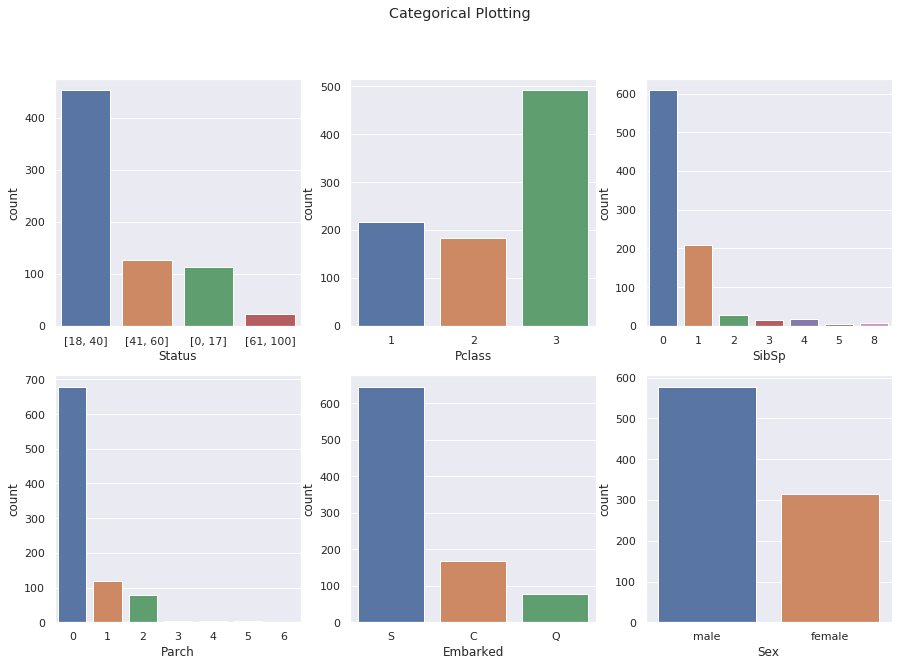

In [24]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 10))
plt.subplot(231)
sns.countplot(x="Status", data=dataframe)
plt.subplot(232)
sns.countplot(x="Pclass", data=dataframe)
plt.subplot(233)
sns.countplot(x="SibSp", data=dataframe)
plt.subplot(234)
sns.countplot(x="Parch", data=dataframe)
plt.subplot(235)
sns.countplot(x="Embarked", data=dataframe)
plt.subplot(236)
sns.countplot(x="Sex", data=dataframe)

plt.suptitle('Categorical Plotting')
plt.show()

## Question: plotting the distribution of numerical columns

For each column for which it makes sense, display its distribution using `seaborn`:
choose the most relevant type of plot for each column and display it.

**Remark.** Note that the `Age` column contains missing values:
show the number of missing / non-missing values in this column, and show the distribution of non-missing ages in a different plot.
Also, note that there is a `notna()` method for dataframes...

### Answer


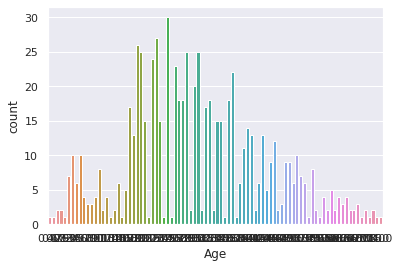

In [78]:
sns.countplot(x=dataframe.Age, data=dataframe)

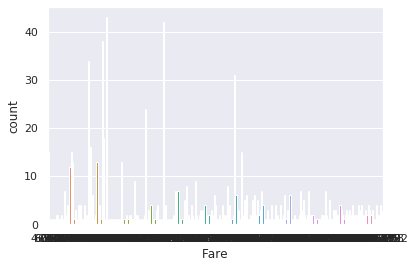

In [73]:
sns.countplot(x=dataframe.Fare, data=dataframe)

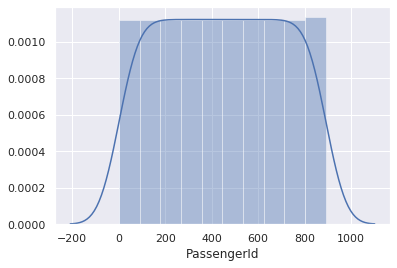

In [70]:
sns.distplot(a=dataframe.PassengerId)



## Question: plot numerical columuns according to categorical columns

Do the same as in Question 4,
but **differentiate** the plots
for passengers the passengers that survived and the ones who did not.
You can use the `hue` option,
you can use a `FacetGrid`.
Look at the `seaborn` documentation and choose the best option.

### Answer

#### Facets



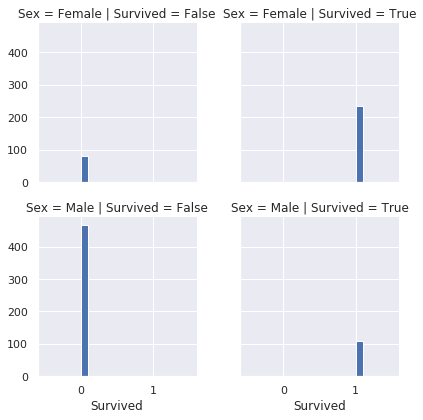

In [62]:
graph = sns.FacetGrid(dataframe, row="Sex", col="Survived")
graph.map(plt.hist, "Survived")

#### Boxplot

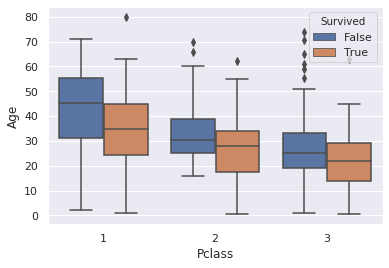

In [55]:
sns.boxplot(x = dataframe.Pclass, y = dataframe.Age, hue = dataframe.Survived)


1.16.1.3  Catplot

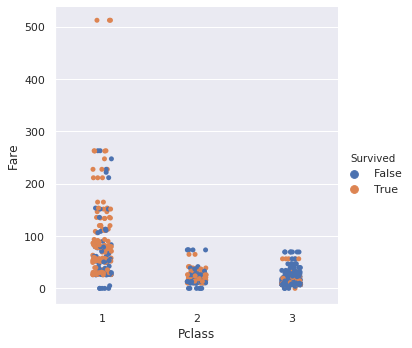

In [64]:
sns.catplot(x="Pclass", y="Fare", hue="Survived", data=dataframe)




## Question: categorical plots, barplots

The `Titanic`  dataset may be compared with datasets generated by
*surveys* (*questionnaires*). In such datasets, each row correspond
to an individual. An individual is described by *demographic* variables
and *attitudinal/response* variables. Here, `Age, Sex, Pclass, Embarked, ...`
are considered as demographic variables while `Survived` is
regarded as an attitudinal/response variable. It is desirable to plot the response
variable as a function of (some of) the demographic variables.
All variables are categorical.

### Answer



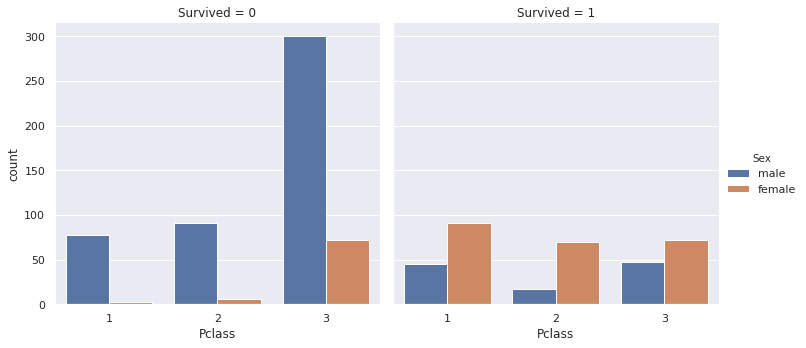

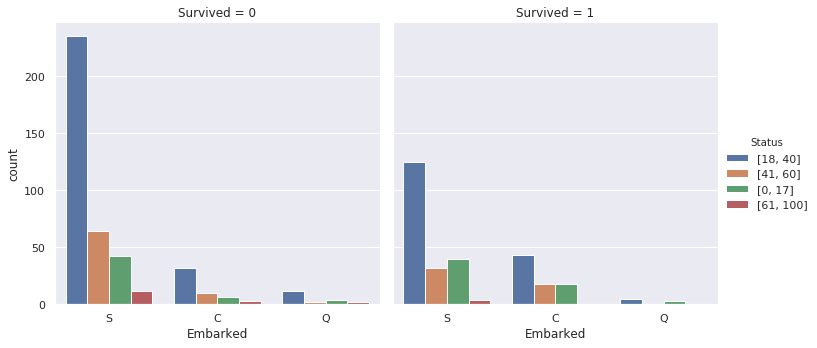

In [34]:
g1 = sns.catplot(x="Pclass", hue="Sex", col="Survived", data=dataframe, kind="count");
g2 = sns.catplot(x="Embarked", hue="Status", col="Survived", data=dataframe, kind="count");


Barplots do not give us hints about the size of the different sub-populations.


## Question: categorical plots, mosaicplots



You have drawn a `boxplot` of `Age` with respect to passenger class (`Pclass`).
It would be nice to complement the plot with an indication of the number of missing values.
It would also make sense to indicate the number of individuals in each subsample.

Mosaicplot as delivered by module `statsmodels` is a very
powerful tool to visualize *contingency tables*.

A *two-way contingency table* and the associated `mosaicplot` reveal that
the passengers who boarded in the three harbors (Southampton, Cherbourg, Q)
did not buy the same kind of tickets. Half of the passengers embarked at Cherbourg
travelled first class while at most one fourth of the passengers embarked
at Southampton did.

### Answer



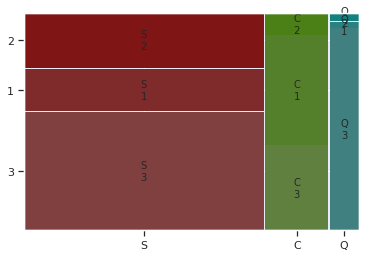

In [45]:
mosaic(dataframe, ["Embarked", "Pclass"])
plt.show()


## Question: three-way mosaicplots

A three-way contingency illustrate the association between `Sex`, `Pclass`
and `Survived`.

### Answer



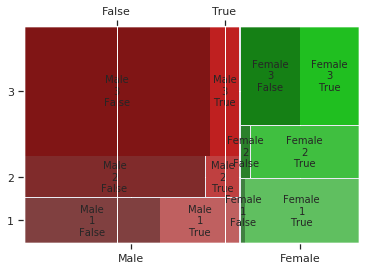

In [53]:
mosaic(dataframe, ["Sex", "Pclass", "Survived"])
plt.show()


## Question: roommates

For each passenger, compute the number of passengers in the same cabin (including himself).
Add a column called `Roommates` that contain this information.
When the cabin information is missing, then the `Roommates` is missing as well.
You will need to use `groupby` and `join` operations.



**Warning.** You should not `reset_index` after the `groupby` operation if you `join` with the resulting dataframe.


We may proceed by projecting on columns
`PassengerId,  and `Cabin` while filtering (selecting) the rows
where `Cabin` is available. This is the `df_cabin` dataframe below.




In [11]:
# Pour chaque valeur dans Cabin (Nan inclus), nombre d'occurrences de cette valeur
L = dataframe.Cabin.value_counts()

# Construction d'une liste Roomates_val contenant des zéros
Roomates_val = [0] * dataframe.count()

# Ajout de la colonne Roomates (avec 0 comme valeur par défaut) au dataframe
dataframe = dataframe.assign(Roomates=pd.Series(Roomates_val.values))

# Pour chaque ligne i, on modifie Roomate[i] avec la valeur de L[key] avec key = Cabin[i]
for i in range(0, dataframe.PassengerId.count()):
    dataframe.Roomates[i] = L[dataframe.Cabin[i]]
    
# Affichage de dataframe
dataframe

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [nan] of <class 'float'>



- Plot `Roommates` according to `Pclass`
- Plot `Roommates` according to `Embarkment`
- Plot `Roommates` according to `Sex`

### Answer

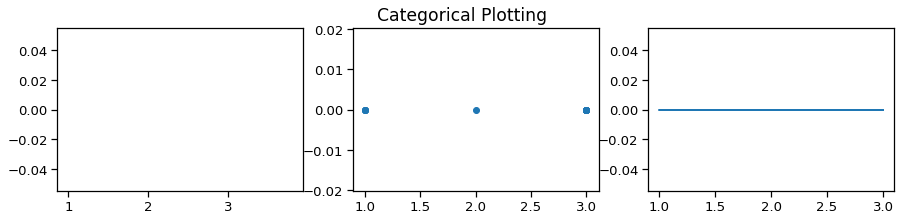

In [8]:
names = dataframe.Pclass
values = dataframe.Roomates

plt.figure(figsize=(15, 3))
plt.xlabel = "Pclass"
plt.ylabel = "Number of Roomates"
plt.subplot(131)
plt.bar(names, values, align="edge")
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()



## Question: plotting  `RoomMates` column.


### Answer



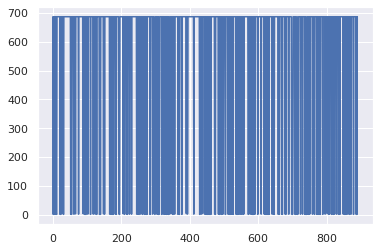

In [163]:
plt.plot(dataframe.Roomates)




## Question: surviving together

Is there a cabin where some passengers survived while others did not?


### Answer





## Question: Missing `Cabin`  value and `Age`


The `Cabin` column is `NaN` for many rows, how are
those missing data distributed acrross the classes?

Plot the age distribution with
respect to the availability of the `Cabin` column (`Cabin.isna()`).

### Answer




## Question: Milking the `Name` column

Column `Name` gathers different kind of information pertaining
to a passenger: name, civility,
and given name(s). For some female passengers, the apparent given names
are actually the husband's name and the maidens name is indicated between
parentheses.

The information contained in the `Name` column Has to be extracted in a proper way:
The string should be into three parts: the first one containing the name,
the second one containing the civility  and, the last one
possibly containing given names or given names plus maiden names. Passing is
facilitated by the next observation: the name is followed by a comma, the
civility is followed by a period. You may use regular expressions
as providede by  module `re`  or module `regex`.


- Split the information contained in `Name` into three columns `Name`, `Given_names`, and `Civility`.
- Go one step further. Extract the *maiden name* and actual *given names* when information available.

At the end of the day, column `Name` should contain the *maiden name* for married female passengers
Column `Given_Names` should contain the real given names of the passenger, not the ones of the spouse.

To learn more about Regular Expressions see the documentation
of the [`re` module](https://docs.python.org/3/library/re.html#module-re)
and the tutorial [Howto](https://docs.python.org/3/howto/regex.html#regex-howto)

Understand the difference between a `string` and a `raw string`.



In [ ]:
print(r"\n is not a newline", "\nis a newline\n", "\\\\n is not a newline\n")



### Answer



In [ ]:
def parse_name(s):
    """Parse name field in Titanic data frame.

    ACHTUNG: there are some outliers with given names containing parenthsized items. Some people travelled under pseudonyms (see [Henry Samuel Morley](https://www.encyclopedia-titanica.org/titanic-victim/henry-samuel-morley.html)).
    """
    name = s
    civility, Spouse_name, Maiden_name = None, None, None

    # TODO:
    
    return {'Name': name,
            'Civility': civility,
            'Given_names': given_names,
            'Spouse_name': Spouse_name,
            'Maiden_name': Maiden_name}




## Question: about `map` objects

What is a `map object`? Is it a sequence (list, tuple, etc)? Is it
an `Iterable`? Something else? You may use function `isinstance` and
submodule `collections.abc` to settle these questions?

### Answer




## Question: aristocrats on board

Some passengers were of noble extraction, or officers in some Army.
Point them.

### Answer




## Question: How many people are given Civility 'Mrs', 'Miss', 'Mr', 'Master'?


### Answer




ACHTUNG: there are some outliers with given names containing parenthsized items. Some people travelled under pseudonyms (see [Henry Samuel Morley](https://www.encyclopedia-titanica.org/titanic-victim/henry-samuel-morley.html)).





## Question:  For each embarkment and sex, visualize the survival ratio.


### Answer




## Question: for each `Pclass` and `Sex`, visualize the survival ratio,

### Answer





## Question: compute pairwise correlations between numerical columns.


### Answer





## Pandas and SQL

A systematic comparison between Pandas and SQL querying can be found
at
[https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)


## Pandas pipeliness

Loading and transforming datasets is a cumbersome task. It is very likely that
the sequence of transformations you have performed on the `train.csv`  dataset will
be carried out on other datasets (just think about `test.csv`). For the sake of
reproducibility, it is convenient to build a *transformation pipeline*.
The `pipe` method for `DataFrame` class provides us with a means to do that.

Pipelining DataFrame methods is easy, it is enough to write:



In [ ]:
# df.meth1(arg11, arg12)\
#   .meth2(arg21)\
#   .meth3(arg31, arg32, arg33)\
#   ...



### `pipe` method for class `DataFrame`


The `pipe` method allows us to chain transformations implemented by functions.
Pipelining ordinary functions can be done using the `pipe` method of
class `DataFrame`.





### Module `pdpipe`

Module [`pdpipe`](https://pdpipe.github.io/pdpipe/) is more ambitious.

A *transformation pipeline* defines a sequence of operations that should be applied
to a dataframe. In the `pdpipe` framework, it is an instance of class `pdpipe.PdPipeLine`





## Question: use `pdpipe`

Build a pipeline of transformatioms
using the [pdpipe](https://pdpipe.github.io/pdpipe/doc/pdpipe/) module.

### Answer





## Miscellanea

Browse the `seaborn` documentation in order to make up your
mind on the following questions.

1. What is a *hue*?
1. Is the *colorPalette* part of style?
1. What is a saturation channel?
1. What is a saturation channel made for?
1. What is an *aesthetic parameter*?
1. What is the type of `seaborn.FacetGrid`?




In [ ]:

## Question: plotting the distribution of numerical columns

For each column for which it makes sense, display its distribution using `seaborn`:
choose the most relevant type of plot for each column and display it.

**Remark.** Note that the `Age` column contains missing values:
show the number of missing / non-missing values in this column, and show the distribution of non-missing ages in a different plot.
Also, note that there is a `notna()` method for dataframes...

### Answer
